<a href="https://colab.research.google.com/github/daaaanish17/Internship_Entrance_Test/blob/main/Internship_Entrance_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part 1 (FICO + Region)

##1. You are tasked to explore the FICO dataset. Walk us through your process on the tasks below:

**I. You need to think about cleaning the data first. Common data problems include duplicates, missing, and errors in the data. Mark rows with data problems as “Missing” in the FICO column.**

In [2]:
# importing libraries

import pandas as pd  #for data manipulation and analysis
import matplotlib.pyplot as plt #for creating visualizations in Python

In [ ]:
df = pd.read_csv('fico.csv')
df.head()

,acct_id,FICO
0,1,768
1,2,850
2,3,677
3,4,843
4,5,796


DATA PRE PROCESSING

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100013 entries, 0 to 100012
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   acct_id  100013 non-null  int64 
 1   FICO     70398 non-null   object
dtypes: int64(1), object(1)
memory usage: 1.5+ MB


In [ ]:
# Selecting duplicate rows based
# on 'acct_id' column

df[df.duplicated('acct_id', keep=False)]

,acct_id,FICO
139,140,752
140,140,752
189,189,745
190,189,745
191,190,828
192,190,828
193,191,752
194,191,752
195,192,850
196,192,850


In [ ]:
# dropping duplicate rows

df = df.drop_duplicates(subset='acct_id' ,keep='first')

In [ ]:
# checking FICO column datatype
df['FICO'].dtype

dtype('O')

DEALING WITH MISSING AND NON NUMERIC VALUES

In [ ]:
# Removing non numeric value from FICO column

import re #regular expression library

def remove_chars(text):
  l = re.compile(r'[^0-9]') 
  return l.sub(r'', str(text)) #replacing with ''
  
df['FICO'] = df['FICO'].apply(remove_chars)  

In [ ]:
df

,acct_id,FICO
0,1,768
1,2,850
2,3,677
3,4,843
4,5,796
...,...,...
100008,99996,
100009,99997,
100010,99998,
100011,99999,


In [ ]:
# Replacing '' with 'Missing'

df['FICO'] = df['FICO'].replace('', 'Missing')
df

,acct_id,FICO
0,1,768
1,2,850
2,3,677
3,4,843
4,5,796
...,...,...
100008,99996,Missing
100009,99997,Missing
100010,99998,Missing
100011,99999,Missing


In [ ]:
# Checking Missing values

df.isna().sum()

acct_id    0
FICO       0
dtype: int64

**II. Think about what you know about credit scores. Segment the FICO scores into 5 groups. Give your reasoning for the bucketing. Display the number of customers and percentage of each segment in your answer and create a histogram of the distribution if you are using Python.**

In [ ]:
df['FICO'].dtype

dtype('O')

In [ ]:
df[(df['FICO'] > 300) & (df['FICO'] <= 500)]

,acct_id,FICO
3330,3326,500
5395,5391,489
7606,7602,420
8405,8401,493
9416,9412,500
...,...,...
91582,91570,494
96736,96724,491
97217,97205,498
97576,97564,482


First we change the datatype of FICO column

In [ ]:
# And for this we need to replace 'Missing' with 0
df['FICO'] = df['FICO'].replace('Missing', 0) 

In [ ]:
# Now changing datatype(object --> int)
df['FICO'] = df['FICO'].astype(int)
df['FICO'].dtype

dtype('int64')

In [ ]:
# max score
print('MAX SCORE: ', max(df['FICO']))

# min score
print('MIN SCORE: ', min(df['FICO']))

MAX SCORE:  850
MIN SCORE:  0


Making groups with the help of percentile(A percentile is a measure used in statistics indicating the value below which a given percentage of observations in a group of observations fall.)

In [ ]:
import numpy as np

zero_percentile = np.percentile(df['FICO'], 0)
twentyFive_percentile = np.percentile(df['FICO'], 25)
fifty_percentile = np.percentile(df['FICO'], 50)
seventyFive_percentile = np.percentile(df['FICO'], 75)
hundred_percentile = np.percentile(df['FICO'], 100)

In [ ]:
print('zero_percentile: ', zero_percentile)
print('twentyFive_percentile: ', twentyFive_percentile)
print('fifty_percentile: ', fifty_percentile)
print('seventyFive_percentile: ', seventyFive_percentile)
print('hundred_percentile: ', hundred_percentile)

zero_percentile:  0.0
twentyFive_percentile:  0.0
fifty_percentile:  759.0
seventyFive_percentile:  827.0
hundred_percentile:  850.0


In [ ]:
for index, values in df.iterrows():
  if values.FICO == zero_percentile:
    df.loc[[index], ['GROUP']] = 'E'
  elif values.FICO > zero_percentile and values.FICO <= twentyFive_percentile:
    df.loc[[index], ['GROUP']] = 'D'   
  elif values.FICO > twentyFive_percentile and values.FICO <= fifty_percentile:
    df.loc[[index], ['GROUP']] = 'C'
  elif values.FICO > fifty_percentile and values.FICO <= seventyFive_percentile:
    df.loc[[index], ['GROUP']] = 'B'
  elif values.FICO > seventyFive_percentile and values.FICO <= hundred_percentile:
    df.loc[[index], ['GROUP']] = 'A'        

In [ ]:
df

,acct_id,FICO,GROUP
0,1,768,B
1,2,850,A
2,3,677,C
3,4,843,A
4,5,796,B
...,...,...,...
100008,99996,0,E
100009,99997,0,E
100010,99998,0,E
100011,99999,0,E


In [ ]:
# group E and D contains lowest scores
# group A contains highest scores

acct_id    0
FICO       0
GROUP      0
dtype: int64

In [ ]:
# Total no. of customer in each group
df['GROUP'].value_counts()

E    29614
B    25101
A    24694
C    20591
Name: GROUP, dtype: int64

Group D is not present because the data in FICO column is not normally distributed. 

And as you can see below that the values of 0 percentile and 25 percentile are same.

zero_percentile:  0.0, 
 twentyFive_percentile:  0.0

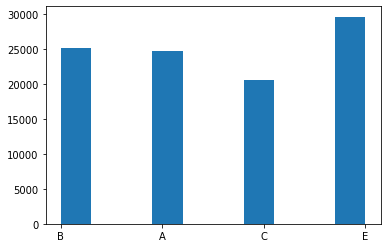

In [ ]:
plt.hist(df['GROUP'])
plt.show()

##2. Now that you have a clean dataset for FICO. Create a temp table to store the information of FICO score and region for each customer. Make sure the customer id is the same for each record. Display the regions which have the second highest and lowest average FICO score. The result of your query should display only two rows showing the region and its average FICO score. Make sure you provide all the interim steps if needed in your final submission.


In [ ]:
# reading region.csv
df2 = pd.read_csv('region.csv')
df2.head()

,acct_id,region
0,1,New York
1,2,Dallas
2,3,Los Angeles
3,4,Chicago
4,5,Philadelphia


In [ ]:
# checking missing values
df2.isna().sum()

acct_id    0
region     0
dtype: int64

In [ ]:
df2.shape

(100173, 2)

In [ ]:
# Selecting duplicate rows based
# on 'acct_id' column

df2[df2.duplicated('acct_id', keep=False)]

,acct_id,region
26,27,Los Angeles
27,27,Los Angeles
28,27,Dallas
2576,2575,Los Angeles
2577,2575,Dallas
...,...,...
97831,97661,Los Angeles
98463,98293,Dallas
98464,98293,Los Angeles
99559,99388,Dallas


In [ ]:
# dropping duplicate rows

df2 = df2.drop_duplicates(subset='acct_id' ,keep='first')

In [ ]:
# Merging two dataframes
df3 = df.merge(df2, on='acct_id', how='outer')
df3

,acct_id,FICO,GROUP,region
0,1,768,B,New York
1,2,850,A,Dallas
2,3,677,C,Los Angeles
3,4,843,A,Chicago
4,5,796,B,Philadelphia
...,...,...,...,...
99995,99996,0,E,Chicago
99996,99997,0,E,New York
99997,99998,0,E,San Diego
99998,99999,0,E,Chicago


Display the regions which have the second highest and lowest average FICO score.

In [ ]:
gp = df3.groupby('region')['FICO'].mean().sort_values(ascending=True)
print('SECOND HIGHEST AVERAGE FICO SCORE\n', gp[-2:-1])
print('\n\nLOWEST AVERAGE FICO SCORE\n', gp[:1])

SECOND HIGHEST AVERAGE FICO SCORE
 region
Phoenix    557.056227
Name: FICO, dtype: float64


LOWEST AVERAGE FICO SCORE
 region
Chicago    544.021489
Name: FICO, dtype: float64


# Part 2 (Guesstimate questions)

## How many Red coloured top Honda SUV cars do you think will be sold in India in 2022? 

**I. What factors do you think will impact sales? You may google about guesstimate questions to answer this question better.**

*ANSWER:*

Factors that Determine Car Sales

a. Interest Rates
b. Disposable Income
c. Inflation
d. Gross Domestic Product
e. Exchange Rates
f. Unemployment Rate
g. Changing Consumer Trends
h. Demographic Shifts

**II. Assume you have all the data you need, what statistical methodology or algorithm will you use to make this sales forecast? Please give a brief explanation of why you choose this model.**

*ANSWER:*

I'll choose Linear Regression because it is commonly used as a quantitative way to determine the underlying trend and when prices are overextended. A linear regression trendline uses the least squares method to plot a straight line through prices so as to minimize the distances between the prices and the resulting trendline.

**III. How would you evaluate your model or determine its accuracy?**

*ANSWER:*

There are three error metrics that are commonly used for evaluating and reporting the performance of a regression model; they are: 
1. Mean Squared Error (MSE) 

2. Root Mean Squared Error (RMSE) 

3. Mean Absolute Error (MAE)

#Part 3 (Fyttlyf website data)

##4. Write a function in Python/R

In [5]:
df_fytlyf = pd.read_excel('Fyttlyf_Website_Data.xlsx')
df_fytlyf.head(2) #printing top 2 rows

,evnt_dt,Event,geo_cntry,sessn_id,visitor_id,payload,page_name,devc_name,browser_type,traffic_source,Level 1,Level 2,Level 3,Level 4,Level 5
0,2021-02-02,Impression,France,zxio1f62e501790ad045c35zxioczxio4fcfd9e0c,gc1f62e501790gcd045c35gccgc4fcfd9e0d,isp_mozioxile_ckijrrier=Deutsche Telekom kijG&...,Home Page,Generic Web Browser,Safari,cspreportnodeweb,1.0,0.0,0.0,0.0,0.0
1,2021-02-02,Impression,France,zxio5zxiod19131790a1d2d7azxio4582fczxio57a97,gc5gcd19131790gc1d2d7gcgc4582fcgc57gc98,isp_mozioxile_ckijrrier=O2 Deutschlkijnd&sessi...,Home Page,Generic Web Browser,Firefox,mppnodeweb,1.0,0.0,0.0,0.0,0.0


**I. To get the output that looks like the below image.**

In [6]:
df4 = df_fytlyf.copy()
df4.head(2)

,evnt_dt,Event,geo_cntry,sessn_id,visitor_id,payload,page_name,devc_name,browser_type,traffic_source,Level 1,Level 2,Level 3,Level 4,Level 5
0,2021-02-02,Impression,France,zxio1f62e501790ad045c35zxioczxio4fcfd9e0c,gc1f62e501790gcd045c35gccgc4fcfd9e0d,isp_mozioxile_ckijrrier=Deutsche Telekom kijG&...,Home Page,Generic Web Browser,Safari,cspreportnodeweb,1.0,0.0,0.0,0.0,0.0
1,2021-02-02,Impression,France,zxio5zxiod19131790a1d2d7azxio4582fczxio57a97,gc5gcd19131790gc1d2d7gcgc4582fcgc57gc98,isp_mozioxile_ckijrrier=O2 Deutschlkijnd&sessi...,Home Page,Generic Web Browser,Firefox,mppnodeweb,1.0,0.0,0.0,0.0,0.0


In [74]:
# Creating function
def fun(dataframe, column_name, Level1, Level2, Level3, Level4, Level5):
  L2L1 = dataframe.groupby(column_name)[Level2].nunique() / df4.groupby(column_name)[Level1].nunique()  
  L3L2 = dataframe.groupby(column_name)[Level3].nunique() / df4.groupby(column_name)[Level2].nunique()
  L4L3 = dataframe.groupby(column_name)[Level4].nunique() / df4.groupby(column_name)[Level3].nunique()    
  L5L4 = dataframe.groupby(column_name)[Level5].nunique() / df4.groupby(column_name)[Level4].nunique()
  new_df = pd.DataFrame({column_name: L2L1.index, 'LEVEL2/LEVEL1': L2L1.values, 'LEVEL3/LEVEL2': L3L2.values, 'LEVEL4/LEVEL3': L4L3.values, 'LEVEL5/LEVEL4': L5L4.values })
  new_df = new_df.set_index('browser_type') 
  return new_df

f = fun(df4, 'browser_type', 'Level 1', 'Level 2 ', 'Level 3', 'Level 4 ', 'Level 5 ')
f

,LEVEL2/LEVEL1,LEVEL3/LEVEL2,LEVEL4/LEVEL3,LEVEL5/LEVEL4
browser_type,,,,
#,1.0,1.0,1.0,0.5
Amazon Silk,1.0,1.0,1.0,0.5
Android Browser,1.0,1.0,1.0,1.0
BlackBerry Browser,1.0,1.0,1.0,1.0
Chrome,1.0,1.0,1.0,1.0
Chrome Mobile,1.0,1.0,1.0,1.0
Chromium,1.0,1.0,1.0,1.0
Edge,1.0,1.0,1.0,1.0
Firefox,1.0,1.0,1.0,1.0


##5. The payload column contains keys=value pairs separated by ‘&’. Make a function that exports a CSV that expands the data in the following format for all key-value pairs in the payload column

In [97]:
# making a copy of dataframe
df5 = df_fytlyf.copy()
df5.head(2)

,evnt_dt,Event,geo_cntry,sessn_id,visitor_id,payload,page_name,devc_name,browser_type,traffic_source,Level 1,Level 2,Level 3,Level 4,Level 5
0,2021-02-02,Impression,France,zxio1f62e501790ad045c35zxioczxio4fcfd9e0c,gc1f62e501790gcd045c35gccgc4fcfd9e0d,isp_mozioxile_ckijrrier=Deutsche Telekom kijG&...,Home Page,Generic Web Browser,Safari,cspreportnodeweb,1.0,0.0,0.0,0.0,0.0
1,2021-02-02,Impression,France,zxio5zxiod19131790a1d2d7azxio4582fczxio57a97,gc5gcd19131790gc1d2d7gcgc4582fcgc57gc98,isp_mozioxile_ckijrrier=O2 Deutschlkijnd&sessi...,Home Page,Generic Web Browser,Firefox,mppnodeweb,1.0,0.0,0.0,0.0,0.0


In [98]:
# making a function that expands the data in the following format for all key-value pairs in the payload column
def sep(col_name):
  df5['payload_key'] = df5[col_name].apply(lambda x: x.split('&')[0])
  df5['payload_val'] = df5[col_name].apply(lambda x: x.split('&')[1])


sep('payload')

In [100]:
df5[['payload', 'payload_key', 'payload_val']].head(3)

,payload,payload_key,payload_val
0,isp_mozioxile_ckijrrier=Deutsche Telekom kijG&...,isp_mozioxile_ckijrrier=Deutsche Telekom kijG,session_id_cookie_id=ziox1f62e501790kijd045c35...
1,isp_mozioxile_ckijrrier=O2 Deutschlkijnd&sessi...,isp_mozioxile_ckijrrier=O2 Deutschlkijnd,session_id_cookie_id=ziox5zioxd19131790kij1d2d...
2,isp_mozioxile_ckijrrier=PlusServer GmzioxH&ses...,isp_mozioxile_ckijrrier=PlusServer GmzioxH,session_id_cookie_id=3004cziox811770kijd0059ff...


##6. Can you write python/R script to answers the following questions with visualization?

**a. What is the CTR (Click-through rate) at  geo_cntry level. (CTR = count distinct sessn_id where event = click /  count distinct sessn_id where event = impressions )**

In [108]:
df5['Event'].unique()

array(['Impression', 'Click'], dtype=object)

In [157]:
event_click_rows = df5[df5['Event'] == 'Click'] 
distint_session_id = event_click_rows['sessn_id'].nunique()

event_impression_rows = df5[df5['Event'] == 'Impression'] 
distint_session_id2 = event_impression_rows['sessn_id'].nunique()

In [158]:
# CTR
ctr = distint_session_id / distint_session_id2 
ctr

0.36376412389679014

**b. What is the trend of the distinct count of visitors on an evnt_dt level? Display your answer in the best possible graph.**

In [115]:
df5['evnt_dt'].unique()

array(['2021-02-02T00:00:00.000000000'], dtype='datetime64[ns]')

In [125]:
visitor_level = df5.groupby('visitor_id')['Level 1', 'Level 2 ', 'Level 3', 'Level 4 ', 'Level 5 '].sum()
visitor_level

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Level 1,Level 2,Level 3,Level 4,Level 5
visitor_id,,,,,
0004gcf521740gc311f9e238c3fed75gc18,2.0,2.0,2.0,2.0,2.0
000d19241790gc7gc06751cgc6dff8deefd,3.0,3.0,0.0,0.0,0.0
000gceec51790gc12d89835775ffffffff,7.0,7.0,0.0,0.0,0.0
001661gc41750gc4dcgc6gcc0996fee10172,0.0,0.0,0.0,0.0,0.0
0019gcdf21790gc7886483725gcff8c0786,2.0,2.0,2.0,0.0,0.0
...,...,...,...,...,...
gcgcgcgc4f0c1780gc1d493e1gcdc8fe872gcec,3.0,3.0,3.0,0.0,0.0
gcgcgcgc6egc61790gc7gc06879c4cdfgcfgc60gc5,2.0,2.0,0.0,0.0,0.0
gcgcgcgc96701780gc276cf3ce9edfe8ec47e,6.0,6.0,0.0,0.0,0.0


In [130]:
visitor_level['Level 1'].values

array([2., 3., 7., ..., 6., 0., 3.])

In [132]:
# summing all the level values

l1 = visitor_level['Level 1'].values.sum()
l2 = visitor_level['Level 2 '].values.sum()
l3 = visitor_level['Level 3'].values.sum()
l4 = visitor_level['Level 4 '].values.sum()
l5 = visitor_level['Level 5 '].values.sum()

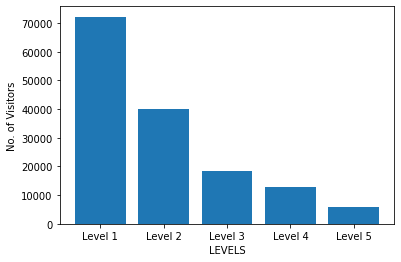

In [133]:
# visual representation

plt.bar(['Level 1', 'Level 2', 'Level 3', 'Level 4', 'Level 5'], [l1, l2, l3, l4, l5])
plt.xlabel('LEVELS')
plt.ylabel('No. of Visitors')
plt.show()

**c. Which browser type get the highest click sessions & on which evnt_dt?**

In [163]:
gpby = event_click_rows.groupby(['browser_type', 'evnt_dt'])['Event'].count().sort_values(ascending=False)
print('Browser type that gets the highest click: \n\n', gpby[:1])

Browser type that gets the highest click: 

 browser_type   evnt_dt   
Chrome Mobile  2021-02-02    10510
Name: Event, dtype: int64


##7. Please briefly describe the latest Data science project you did in less than 500 words.

# Sales Data Analysis
PROJECT LINK: https://github.com/daaaanish17/sales_data_analysis

A project developed in python.

## Information

We use Python libraries(Pandas, Matplotlib, Seaborn) to analyze and answer business questions about 12 months worth of sales data. The data contains hundreds of thousands of electronics store purchases broken down by month, product type, cost, purchase address, etc.


We start by cleaning our data. Tasks during this section include:

* Drop NaN values from DataFrame
* Removing rows based on a condition
* Change the type of columns (to_numeric, to_datetime, astype)

Once we have cleaned up our data a bit, we move the data exploration section. In this section we explore 4 high level business questions related to our data:

* What was the best month for sales? How much was earned that month?
* What city sold the most product?
* Which are the most selling products?
* What time should we display advertisemens to maximize the likelihood of customer’s buying product?

To answer these questions we walk through many different pandas & matplotlib methods. They include:

* Concatenating multiple csvs together to create a new DataFrame (pd.concat)
* Adding columns
* Parsing cells as strings to make new columns (.str)
* Using the .apply() method
* Using groupby to perform aggregate analysis
* Plotting bar charts and lines graphs to visualize our results
* Labeling our graphs
